# 02_01 Baseline
## Library: Keras
## Dataset: Features02

In [1]:
import pandas as pd
import numpy as np
from tensorflow.contrib import keras

from smh_eyetracking.features02 import config as config_features02
from smh_eyetracking.features02.utils.features02_dlib import FEATURES, TARGETS
from smh_eyetracking.keras import config as config_keras
from smh_eyetracking.keras import losses
from smh_eyetracking.utils import data_model

## Load data

In [2]:
data, imgs_left, imgs_right = data_model.load(
    config_features02.PATH_DATA_FEATURES02_DLIB_AUGMENTED_NORM_CSV,
    config_features02.PATH_DATA_FEATURES02_DLIB_AUGMENTED_NORM_IMGS_LEFT,
    config_features02.PATH_DATA_FEATURES02_DLIB_AUGMENTED_NORM_IMGS_RIGHT
)

## Split data

In [3]:
(
    (train_data, train_imgs_left, train_imgs_right),
    (validation_data, validation_imgs_left, validation_imgs_right),
    (test_data, test_imgs_left, test_imgs_right)
) = data_model.split(
    data, imgs_left, imgs_right,
    train_size=0.95,
    validation_size=0.95,
    random_state=42
)

In [4]:
print("Train length: {}".format(len(train_data)))
print("Validation length: {}".format(len(validation_data)))
print("Test length: {}".format(len(test_data)))

Train length: 82118
Validation length: 4322
Test length: 4550


## Model

### Architecture

![](img/models/02-baseline.png)

In [5]:
img_width, img_height = config_features02.FEATURES02_EYES_SIZE
img_shape = (img_height, img_width)

def get_model():

    # Inputs
    left_imgs = keras.layers.Input(shape=img_shape, name='left_imgs', dtype='float32')
    right_imgs = keras.layers.Input(shape=img_shape, name='right_imgs', dtype='float32')
    features = keras.layers.Input(shape=(len(FEATURES),), name='features', dtype='float32')
    # Flatten images & concatenate
    flat_input = keras.layers.Concatenate()([
        keras.layers.Flatten()(left_imgs),
        keras.layers.Flatten()(right_imgs),
        features
    ])
    # Dense
    d_1 = keras.layers.Dense(1024, activation=keras.activations.relu)(flat_input)
    d_2 = keras.layers.Dense(512, activation=keras.activations.relu)(d_1)
    d_3 = keras.layers.Dense(128, activation=keras.activations.relu)(d_2)
    d_4 = keras.layers.Dense(2)(d_3)
    # Model
    model = keras.models.Model(
        inputs=[left_imgs, right_imgs, features],
        outputs=[d_4]
    )
    return model

### Parameters

In [9]:
MODEL_NAME = '01_baseline-02'

EPOCHS = 200
BATCH_SIZE = 128
LEARNING_RATE = 0.0005
DECAY = 0.00001

LOSS = losses.mean_euclidean

In [7]:
model = get_model()


model.compile(
    loss=LOSS,
    metrics=[losses.mean_euclidean],
    optimizer=keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=DECAY)
)

print("Parameters to adjust: {}".format(
    np.sum([keras.backend.count_params(p) for p in set(model.trainable_weights)])
))

Parameters to adjust: 2246530


### Train

In [8]:
model.fit(
    x={
        'left_imgs':train_imgs_left,
        'right_imgs': train_imgs_right,
        'features': train_data[FEATURES].as_matrix()
    },
    y=train_data[TARGETS].as_matrix(),
    validation_data=(
        {
            'left_imgs': validation_imgs_left,
            'right_imgs': validation_imgs_right,
            'features': validation_data[FEATURES].as_matrix()
        },
        validation_data[TARGETS].as_matrix()
    ),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1, callbacks=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0
)

Train on 82118 samples, validate on 4322 samples
Epoch 1/200
82118/82118 [==============================] - 38s - loss: 0.3363 - mean_euclidean: 0.3363 - val_loss: 0.2754 - val_mean_euclidean: 0.2754
Epoch 2/200
82118/82118 [==============================] - 39s - loss: 0.2431 - mean_euclidean: 0.2431 - val_loss: 0.2537 - val_mean_euclidean: 0.2537
Epoch 3/200
82118/82118 [==============================] - 37s - loss: 0.2117 - mean_euclidean: 0.2117 - val_loss: 0.2178 - val_mean_euclidean: 0.2178
Epoch 4/200
82118/82118 [==============================] - 37s - loss: 0.1922 - mean_euclidean: 0.1922 - val_loss: 0.2128 - val_mean_euclidean: 0.2128
Epoch 5/200
82118/82118 [==============================] - 37s - loss: 0.1765 - mean_euclidean: 0.1765 - val_loss: 0.2041 - val_mean_euclidean: 0.2041
Epoch 6/200
82118/82118 [==============================] - 37s - loss: 0.1639 - mean_euclidean: 0.1639 - val_loss: 0.1961 - val_mean_euclidean: 0.1961
Epoch 7/200
82118/82118 [====================

82118/82118 [==============================] - 36s - loss: 0.0451 - mean_euclidean: 0.0451 - val_loss: 0.1275 - val_mean_euclidean: 0.1275
Epoch 55/200
82118/82118 [==============================] - 36s - loss: 0.0444 - mean_euclidean: 0.0444 - val_loss: 0.1298 - val_mean_euclidean: 0.1298
Epoch 56/200
82118/82118 [==============================] - 36s - loss: 0.0442 - mean_euclidean: 0.0442 - val_loss: 0.1259 - val_mean_euclidean: 0.1259
Epoch 57/200
82118/82118 [==============================] - 36s - loss: 0.0439 - mean_euclidean: 0.0439 - val_loss: 0.1279 - val_mean_euclidean: 0.1279
Epoch 58/200
82118/82118 [==============================] - 36s - loss: 0.0432 - mean_euclidean: 0.0432 - val_loss: 0.1290 - val_mean_euclidean: 0.1290
Epoch 59/200
82118/82118 [==============================] - 36s - loss: 0.0425 - mean_euclidean: 0.0425 - val_loss: 0.1259 - val_mean_euclidean: 0.1259
Epoch 60/200
82118/82118 [==============================] - 36s - loss: 0.0416 - mean_euclidean: 0.04

82118/82118 [==============================] - 37s - loss: 0.0274 - mean_euclidean: 0.0274 - val_loss: 0.1207 - val_mean_euclidean: 0.1207
Epoch 108/200
82118/82118 [==============================] - 36s - loss: 0.0272 - mean_euclidean: 0.0272 - val_loss: 0.1219 - val_mean_euclidean: 0.1219
Epoch 109/200
82118/82118 [==============================] - 36s - loss: 0.0272 - mean_euclidean: 0.0272 - val_loss: 0.1213 - val_mean_euclidean: 0.1213
Epoch 110/200
82118/82118 [==============================] - 36s - loss: 0.0270 - mean_euclidean: 0.0270 - val_loss: 0.1206 - val_mean_euclidean: 0.1206
Epoch 111/200
82118/82118 [==============================] - 36s - loss: 0.0267 - mean_euclidean: 0.0267 - val_loss: 0.1208 - val_mean_euclidean: 0.1208
Epoch 112/200
82118/82118 [==============================] - 36s - loss: 0.0268 - mean_euclidean: 0.0268 - val_loss: 0.1207 - val_mean_euclidean: 0.1207
Epoch 113/200
82118/82118 [==============================] - 36s - loss: 0.0263 - mean_euclidean

82118/82118 [==============================] - 36s - loss: 0.0201 - mean_euclidean: 0.0201 - val_loss: 0.1187 - val_mean_euclidean: 0.1187
Epoch 161/200
82118/82118 [==============================] - 36s - loss: 0.0200 - mean_euclidean: 0.0200 - val_loss: 0.1184 - val_mean_euclidean: 0.1184
Epoch 162/200
82118/82118 [==============================] - 36s - loss: 0.0200 - mean_euclidean: 0.0200 - val_loss: 0.1188 - val_mean_euclidean: 0.1188
Epoch 163/200
82118/82118 [==============================] - 36s - loss: 0.0200 - mean_euclidean: 0.0200 - val_loss: 0.1190 - val_mean_euclidean: 0.1190
Epoch 164/200
82118/82118 [==============================] - 36s - loss: 0.0196 - mean_euclidean: 0.0196 - val_loss: 0.1186 - val_mean_euclidean: 0.1186
Epoch 165/200
82118/82118 [==============================] - 36s - loss: 0.0198 - mean_euclidean: 0.0198 - val_loss: 0.1191 - val_mean_euclidean: 0.1191
Epoch 166/200
82118/82118 [==============================] - 36s - loss: 0.0195 - mean_euclidean

In [10]:
model.save(config_keras.PATH_MODELS_KERAS+MODEL_NAME)

### Test

In [11]:
model_test = keras.models.load_model(
    filepath=config_keras.PATH_MODELS_KERAS+MODEL_NAME,
    custom_objects={
        "mean_euclidean": losses.mean_euclidean,
        "ms_euclidean": losses.ms_euclidean,
        "reg_mean_euclidean": losses.reg_mean_euclidean
    }
)

In [12]:
model_test.evaluate(
    x={
        'left_imgs':test_imgs_left,
        'right_imgs': test_imgs_right,
        'features': test_data[FEATURES].as_matrix()
    },
    y=test_data[TARGETS].as_matrix(),
    batch_size=1,
    verbose=1, sample_weight=None
)

4510/4550 [============================>.] - ETA: 0s

[0.11771296284609259, 0.11771296284609259]

### Results


| Name | Epochs | Batch Size | Learning rate | Decay | Loss | Train | Validation | Test |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| 01_baseline-01 | 50 | 128| 0.0005 | 0.00001 | mean_euclidean | 0.0486 | 0.1338 | 0.1332 |
| 01_baseline-02 | 200 | 128| 0.0005 | 0.00001 | mean_euclidean | 0.0168 |  0.1181 | 0.1177 |

157 epochs seem to be enough

### Errors

In [ ]:
import seaborn as sns
%matplotlib inline


#### Test

In [44]:
test_predictions = model_test.predict(
    x={
        'left_imgs':test_imgs_left,
        'right_imgs': test_imgs_right,
        'features': test_data[FEATURES].as_matrix()
    }
)

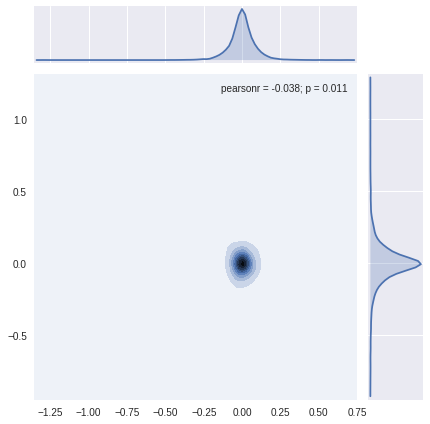

In [45]:
test_errors = test_data[TARGETS].as_matrix()-test_predictions
sns.jointplot(x=test_errors[:,0], y=test_errors[:,1], kind="kde")

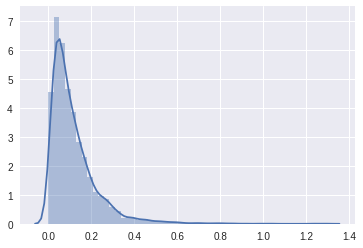

In [46]:
test_euclidean_errors = np.linalg.norm(test_errors, ord=2, axis=1)
sns.distplot(test_euclidean_errors)

#### Train

In [47]:
train_predictions = model_test.predict(
    x={
        'left_imgs':train_imgs_left,
        'right_imgs': train_imgs_right,
        'features': train_data[FEATURES].as_matrix()
    }
)

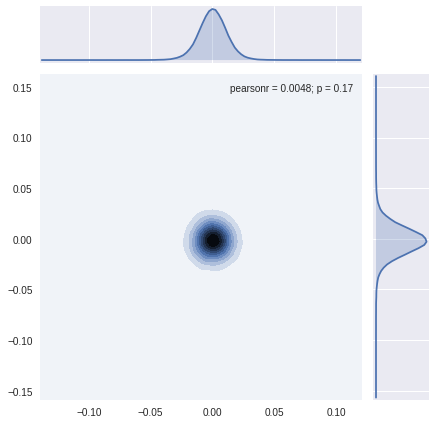

In [49]:
train_errors = train_data[TARGETS].as_matrix()-train_predictions
sns.jointplot(x=train_errors[:,0], y=train_errors[:,1], kind="kde")

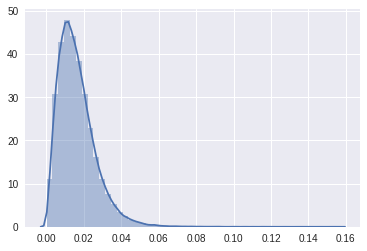

In [51]:
train_euclidean_errors = np.linalg.norm(train_errors, ord=2, axis=1)
sns.distplot(train_euclidean_errors)